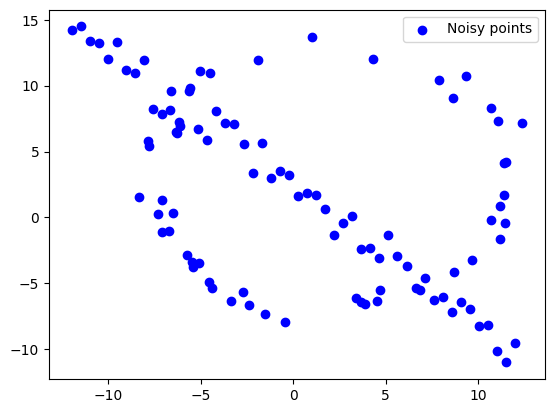

Best line model parameters (a, b, d): (np.float64(-2.263767478216634), np.float64(-1.9591836734693882), np.float64(2.0952200183030385))


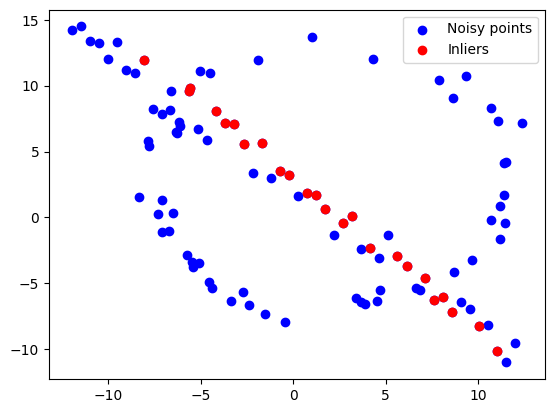

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy data
np.random.seed(0)
N = 100
half_n = N // 2

# Circle data
r = 10
x0_gt, y0_gt = 2, 3  # Ground truth center
s = r / 16
theta = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x_circ = x0_gt + (r + n) * np.cos(theta)
y_circ = y0_gt + (r + n) * np.sin(theta)
X_circ = np.vstack((x_circ, y_circ)).T

# Line data
s_line = 1.
m, b = -1, 2  # Ground truth slope and intercept
x_line = np.linspace(-12, 12, half_n)
y_line = m * x_line + b + s_line * np.random.randn(half_n)
X_line = np.vstack((x_line, y_line)).T

# Combine the two sets of points
X = np.vstack((X_circ, X_line))

# Plot initial data
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Noisy points')
plt.legend()
plt.show()

# Implement RANSAC for line fitting
def ransac_line(X, threshold, max_iter=1000):
    best_inliers = []
    best_model = None
    for _ in range(max_iter):
        # Sample two random points
        sample = X[np.random.choice(X.shape[0], 2, replace=False)]
        p1, p2 = sample

        # Define the line using the cross product to find [a, b, d]
        line = np.cross(np.append(p1, 1), np.append(p2, 1))  # ax + by + d = 0
        a, b, d = line[0], line[1], line[2]
        normal = np.array([a, b]) / np.sqrt(a**2 + b**2)  # Normalize

        # Compute distances to the line for all points
        distances = np.abs(np.dot(X, normal) + d) / np.linalg.norm(normal)
        
        # Select inliers
        inliers = X[distances < threshold]
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_model = (a, b, d)
    
    return best_model, best_inliers

best_model, best_inliers = ransac_line(X, threshold=0.5)
print("Best line model parameters (a, b, d):", best_model)

# Plot best line fit
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Noisy points')
plt.scatter(best_inliers[:, 0], best_inliers[:, 1], color='red', label='Inliers')
plt.legend()
plt.show()


In [3]:
from scipy.optimize import minimize

# Define function for fitting a circle
def fit_circle(points):
    def calc_R(xc, yc):
        return np.sqrt((points[:, 0] - xc) ** 2 + (points[:, 1] - yc) ** 2)

    def f_2(c):
        Ri = calc_R(*c)
        return np.std(Ri)

    center_estimate = np.mean(points, axis=0)
    center_optimized = minimize(f_2, center_estimate).x
    radii = calc_R(*center_optimized)
    return center_optimized[0], center_optimized[1], np.mean(radii)

# RANSAC for circle fitting (modify for RANSAC loop)
circle_model = fit_circle(X_circ)
print("Circle center (x, y), radius:", circle_model)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\pasin\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\pasin\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\pasin\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\pasin\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import